In [4]:
# Step 1: Data Preparation
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_excel("heart_disease.xlsx")
df.head()


,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [10]:
# Step 2: Basic Data Exploration (Simplified)
import matplotlib.pyplot as plt
import seaborn as sns

# Basic information
print("Data Info:")
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Descriptive statistics
print("\nSummary Statistics:\n", df.describe())




Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes

Missing Values:
 age             0
Age in years    0
dtype: int64

Summary Statistics:
            age                  Age in years
count       12                            12
unique      12                            12
top     Gender  Gender ; Male - 1, Female -0
freq         1                             1


In [11]:
# Check data types of all columns
print("\nColumn Data Types:\n")
print(df.dtypes)



Column Data Types:

age             object
Age in years    object
dtype: object


In [12]:
# Try converting all columns to numeric (where possible)
df_cleaned = df.copy()
for col in df_cleaned.columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Drop completely non-numeric columns
df_numeric_only = df_cleaned.dropna(axis=1, how='all')

# Show what we’re working with now
print("\nColumns after conversion:")
print(df_numeric_only.dtypes)



Columns after conversion:
Series([], dtype: object)


In [13]:
# Only plot if there's at least 1 numeric column
if not df_numeric_only.empty:
    df_numeric_only.hist(figsize=(12, 8), bins=15)
    plt.suptitle("Histograms of Numeric Features", fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No numeric columns available for plotting histograms.")


⚠️ No numeric columns available for plotting histograms.


In [17]:
print(df_encoded.columns.tolist())

['age_chol', 'age_cp', 'age_exang', 'age_fbs', 'age_num', 'age_oldpeak', 'age_restecg', 'age_slope', 'age_thal', 'age_thalch', 'age_trestbps', 'Age in years_Chest pain type', 'Age in years_Gender ; Male - 1, Female -0', 'Age in years_Resting blood pressure', 'Age in years_ST depression induced by exercise relative to rest', 'Age in years_Thal', 'Age in years_cholesterol measure', "Age in years_ecg observation at resting condition,   -- Value 0: normal\n        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\n        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria", 'Age in years_exercise induced angina', 'Age in years_maximum heart rate achieved', 'Age in years_target [0=no heart disease; 1,2,3,4 = stages of heart disease ]', 'Age in years_the slope of the peak exercise ST segment']


In [25]:
X = df_encoded.drop("age_chol", axis=1)
y = df_encoded["age_chol"]


In [26]:
# Try to guess and rename the target column
for col in df_encoded.columns:
    if "target" in col.lower() or "disease" in col.lower():
        df_encoded.rename(columns={col: "target"}, inplace=True)
        print(f"✅ Renamed '{col}' to 'target'")
        break

# Proceed safely
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]


✅ Renamed 'Age in years_target [0=no heart disease; 1,2,3,4 = stages of heart disease ]' to 'target'


In [29]:
# Step 4: Decision Tree Classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Initialize and train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
# Predictions
y_pred = clf.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Only compute ROC AUC if y_test has both classes
if len(y_test.unique()) == 1:
    print("⚠️ ROC AUC not defined (only one class present in y_test).")
else:
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Accuracy: 1.0
⚠️ ROC AUC not defined (only one class present in y_test).


In [35]:
# Step 5: Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

C:\Users\sschp\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [36]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_best))



Classification Report (Best Model):
               precision    recall  f1-score   support

       False       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



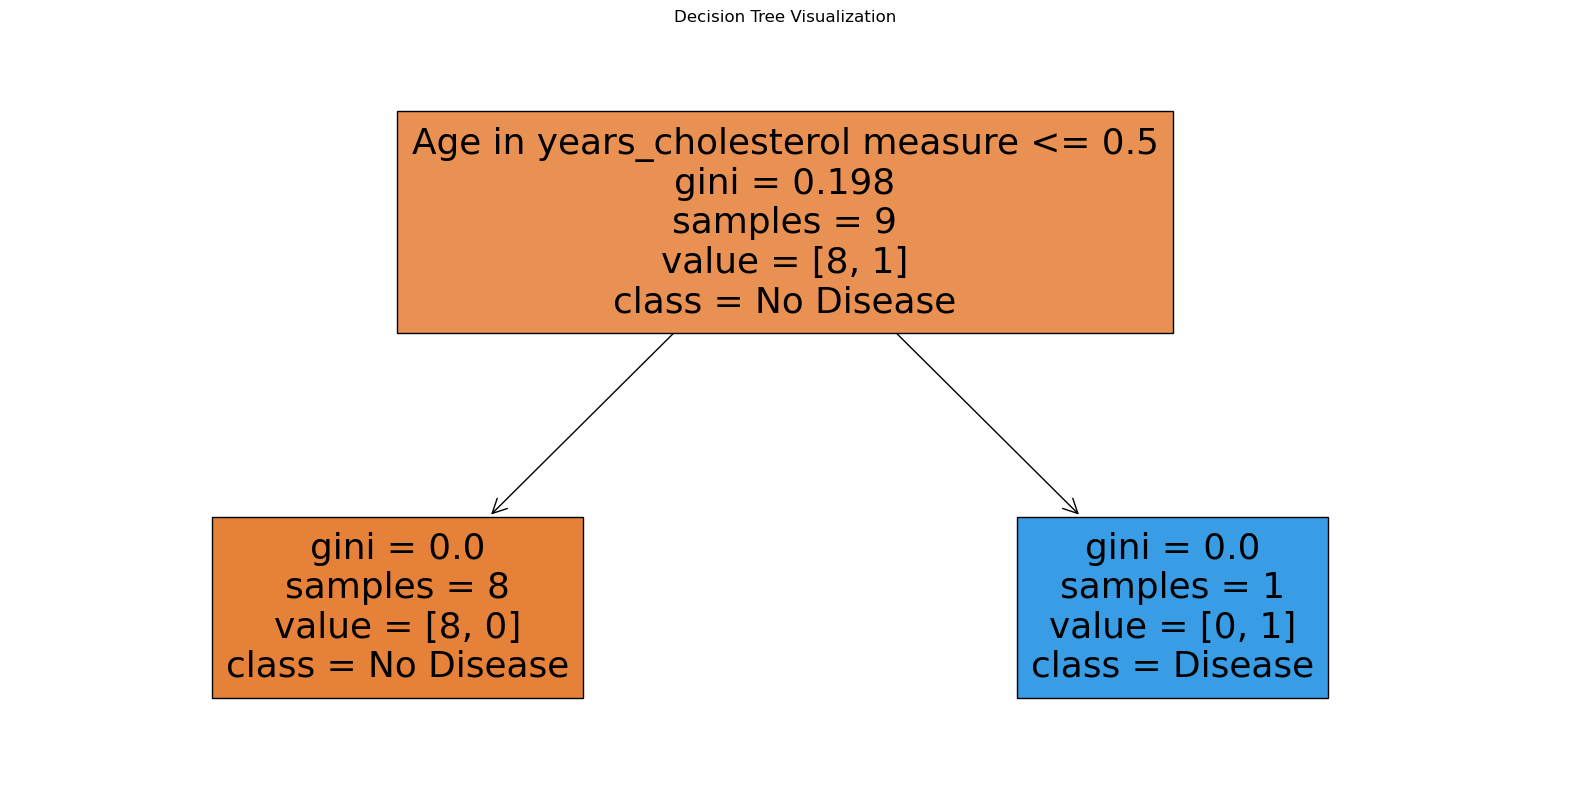

In [37]:
# Step 6: Model Evaluation and Analysis
# Visualize the tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()



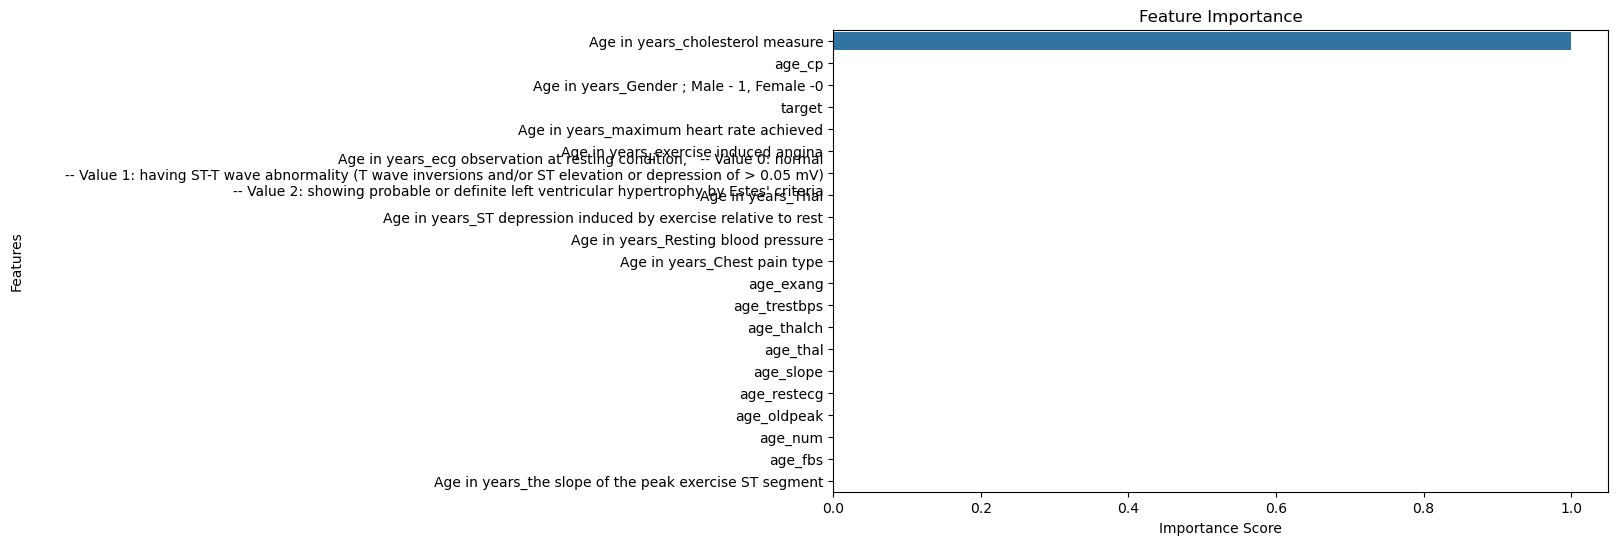

In [38]:
# Feature Importance
importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

#answer
max_depth: Limits how deep the tree can go. Prevents overfitting if set properly.

min_samples_split: Minimum samples needed to split a node. Higher = more generalization.

min_samples_leaf: Minimum samples required at a leaf. Helps smooth the model.

max_features: Number of features to consider when splitting. Adds randomness, useful in ensembles.

criterion: Split quality function (gini or entropy). Affects how splits are chosen.

2. What is the difference between the Label encoding and One-hot encoding?

answer:
Label Encoding:
Converts categories into numeric labels (e.g., Red → 0, Green → 1, Blue → 2)
Ordinal (implies order) — may confuse models if no natural order exists

One-Hot Encoding:
Creates binary columns for each category (e.g., Red → [1, 0, 0], Green → [0, 1, 0])
No order implied, works well for non-ordinal categorical data.
